# A baseline ML models for comparison

## 1. Load the data

In [57]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [58]:
dataset_path = "../datasets/Edge-IIoT/"

df = pd.read_pickle(dataset_path + "Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.pkl")   

In [59]:
# Show the first 5 rows of the dataset
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [60]:
# Show the different attack labels
print(df['Attack_type'].value_counts())

# Show the shape and size of the dataset
print(f"\nDataframe shape: {df.shape}")

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64

Dataframe shape: (2219201, 63)


### Data Preparation - Drop data (Columns, duplicated rows, NAN, Null..)

In [61]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

# Compute the number of missing values (NaN or null) in each column of a pandas DataFrame object named df.
df.isna().sum()

arp.opcode                   0
arp.hw.size                  0
icmp.checksum                0
icmp.seq_le                  0
icmp.unused                  0
http.content_length          0
http.request.method          0
http.referer                 0
http.request.version         0
http.response                0
http.tls_port                0
tcp.ack                      0
tcp.ack_raw                  0
tcp.checksum                 0
tcp.connection.fin           0
tcp.connection.rst           0
tcp.connection.syn           0
tcp.connection.synack        0
tcp.flags                    0
tcp.flags.ack                0
tcp.len                      0
tcp.seq                      0
udp.stream                   0
udp.time_delta               0
dns.qry.name                 0
dns.qry.name.len             0
dns.qry.qu                   0
dns.qry.type                 0
dns.retransmission           0
dns.retransmit_request       0
dns.retransmit_request_in    0
mqtt.conack.flags            0
mqtt.con

In [62]:
# Show the shape and size of the dataset
print(f"\nDataframe shape: {df.shape}")

# Show the first 5 rows of the dataset
df.head()


Dataframe shape: (1909671, 48)


,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
400738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1309867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
1319387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1019010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
829785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909671 entries, 400738 to 1594606
Data columns (total 48 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 float64
 1   arp.hw.size                float64
 2   icmp.checksum              float64
 3   icmp.seq_le                float64
 4   icmp.unused                float64
 5   http.content_length        float64
 6   http.request.method        object 
 7   http.referer               object 
 8   http.request.version       object 
 9   http.response              float64
 10  http.tls_port              float64
 11  tcp.ack                    float64
 12  tcp.ack_raw                float64
 13  tcp.checksum               float64
 14  tcp.connection.fin         float64
 15  tcp.connection.rst         float64
 16  tcp.connection.syn         float64
 17  tcp.connection.synack      float64
 18  tcp.flags                  float64
 19  tcp.flags.ack              float64
 2

### Step 4 : Categorical data encoding (Dummy Encoding):

EG. Takes a product category and converts it to a binary vector
```
   customer_id product_category  apparel  books  electronics
0            1     electronics        0      0            1
1            2          apparel       1      0            0
2            3            books       0      1            0
3            4     electronics        0      0            1
4            5          apparel       1      0            0
```



In [64]:
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

Grab the Attack type and attack label

In [65]:
# Creating a dictionary of Types
attacks = {'Normal': 0 ,'Backdoor' :1, 'DDoS_HTTP':2,  'DDoS_ICMP':3, 'DDoS_TCP':4, 'DDoS_UDP':5, 
           'Fingerprinting':6, 'MITM':7, 'Password':8, 'Port_Scanning':9, 'Ransomware':10, 
           'SQL_injection':11, 'Uploading':12, 'Vulnerability_scanner':13, 'XSS':14}

df['Attack_type'] = df['Attack_type'].map(attacks)


In [66]:
# Save the attack type and attack label
attack_type = df.pop('Attack_type')
attack_label = df.pop('Attack_label')

In [67]:
#print out mapping of attack types values dictionary to descriptions
# Get the count of each attack type
attack_counts = attack_type.map({v: k for k, v in attacks.items()}).value_counts()

for attack, code in attacks.items():
    count = attack_counts[attack] if attack in attack_counts else 0
    print(f'{code} - {attack} \t\t\t- {count}')


0 - Normal 			- 1363998
1 - Backdoor 			- 24026
2 - DDoS_HTTP 			- 48544
3 - DDoS_ICMP 			- 67939
4 - DDoS_TCP 			- 50062
5 - DDoS_UDP 			- 121567
6 - Fingerprinting 			- 853
7 - MITM 			- 358
8 - Password 			- 49933
9 - Port_Scanning 			- 19977
10 - Ransomware 			- 9689
11 - SQL_injection 			- 50826
12 - Uploading 			- 36807
13 - Vulnerability_scanner 			- 50026
14 - XSS 			- 15066


Scaling of features

In [68]:
# Scaling of features to fit within defined range
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaled_features = StandardScaler().fit_transform(df.values)

# Label Preprocessing
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# label_n = le.fit_transform(attack_type.values)

label_n = attack_type.values


In [69]:
# Test / train split
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_features, label_n, stratify=label_n, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, label_n, stratify=label_n, test_size=0.2, random_state=42)
print ("Train:", X_train.shape, y_train.shape)
print ("Test:", X_test.shape, y_test.shape)

Train: (1527736, 95) (1527736,)
Test: (381935, 95) (381935,)


In [71]:
len(np.unique(y_test))

15

In [72]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1527736, 95)
(381935, 95)
(1527736,)
(381935,)


We now have our data in a typical ***X_train, X_test, y_train, y_test*** format, where we can then deploy centralised and decentralised ML models.

## 2. Centralised Machine Learning Models

### 2.1 Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
%%time
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

CPU times: total: 7.09 s
Wall time: 7.12 s


DecisionTreeClassifier()

In [75]:
dt_score = dTree_clf.score(X_test, y_test)
print("Accuracy of Model::", dt_score)

Accuracy of Model:: 0.9803500595651092


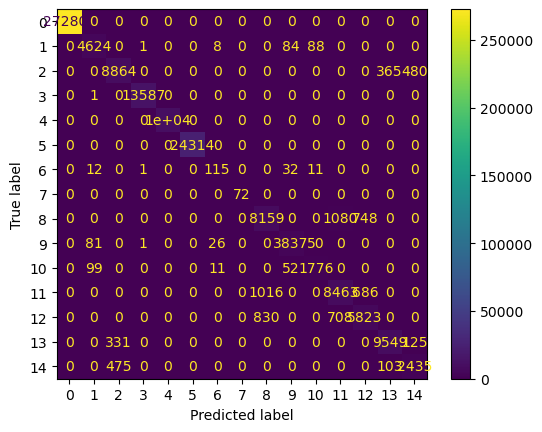

In [76]:
dt_predictions = dTree_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_cm = confusion_matrix(y_test, dt_predictions, labels=dTree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dTree_clf.classes_)
disp.plot()
plt.show()

In [77]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, dt_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, dt_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, dt_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, dt_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.9115664189789924, 0.9085181122837505, 0.9099851035804968, None)
Micro: (0.9803500595651092, 0.9803500595651092, 0.9803500595651092, None)
Weighted: (0.9803428720904667, 0.9803500595651092, 0.9803446188362446, None)
Per-label: (array([1.        , 0.95993357, 0.91664943, 0.99977925, 1.        ,
       1.        , 0.71875   , 1.        , 0.81549225, 0.95805243,
       0.9225974 , 0.82557799, 0.80239768, 0.95327942, 0.80098684]), array([1.        , 0.96233091, 0.91296735, 0.99992641, 1.        ,
       1.        , 0.67251462, 1.        , 0.81696205, 0.96045056,
       0.91640867, 0.83256272, 0.791061  , 0.95442279, 0.80816462]), array([1.        , 0.96113074, 0.91480469, 0.99985282, 1.        ,
       1.        , 0.69486405, 1.        , 0.81622649, 0.95925   ,
       0.91949262, 0.82905564, 0.79668901, 0.95385076, 0.80455972]), array([272800,   4805,   9709,  13588,  10012,  24314,    171,     72,
         9987,   3995,   1938,  10165,   7361,  10005,   3013],
      dtype=int64))

In [78]:
print(confusion_matrix(y_test, dt_predictions))

[[272800      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0   4624      0      1      0      0      8      0      0     84
      88      0      0      0      0]
 [     0      0   8864      0      0      0      0      0      0      0
       0      0      0    365    480]
 [     0      1      0  13587      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0  10012      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0  24314      0      0      0      0
       0      0      0      0      0]
 [     0     12      0      1      0      0    115      0      0     32
      11      0      0      0      0]
 [     0      0      0      0      0      0      0     72      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      0   8159      0
       0   1080    748      0      0]
 [     0  

In [79]:
print("DT Classification Report")
print(classification_report(y_test, dt_predictions))


DT Classification Report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272800
           1       0.96      0.96      0.96      4805
           2       0.92      0.91      0.91      9709
           3       1.00      1.00      1.00     13588
           4       1.00      1.00      1.00     10012
           5       1.00      1.00      1.00     24314
           6       0.72      0.67      0.69       171
           7       1.00      1.00      1.00        72
           8       0.82      0.82      0.82      9987
           9       0.96      0.96      0.96      3995
          10       0.92      0.92      0.92      1938
          11       0.83      0.83      0.83     10165
          12       0.80      0.79      0.80      7361
          13       0.95      0.95      0.95     10005
          14       0.80      0.81      0.80      3013

    accuracy                           0.98    381935
   macro avg       0.91      0.91      0.91    381935
weighted avg       0.98   

### 2.2 Random Forest Classifier

In [80]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
%%time
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

CPU times: total: 2min 26s
Wall time: 2min 26s


RandomForestClassifier(random_state=42)

Accuracy of Random Forest model: 0.9814052129289015


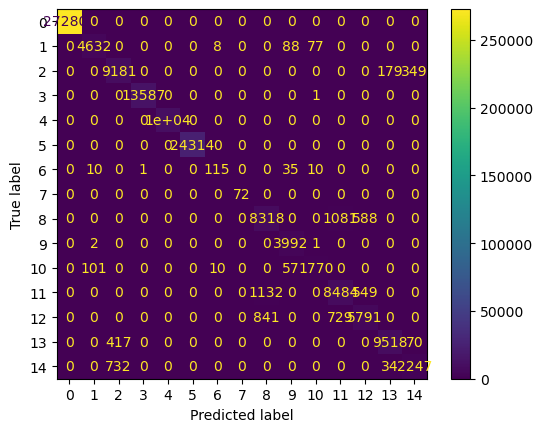

In [82]:
rf_score = rf.score(X_test, y_test)
print("Accuracy of Random Forest model:", rf_score)

rf_predictions = rf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_cm = confusion_matrix(y_test, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
disp.plot()

plt.show()

In [83]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272800
           1       0.98      0.96      0.97      4805
           2       0.89      0.95      0.92      9709
           3       1.00      1.00      1.00     13588
           4       1.00      1.00      1.00     10012
           5       1.00      1.00      1.00     24314
           6       0.86      0.67      0.76       171
           7       1.00      1.00      1.00        72
           8       0.81      0.83      0.82      9987
           9       0.96      1.00      0.98      3995
          10       0.95      0.91      0.93      1938
          11       0.82      0.83      0.83     10165
          12       0.84      0.79      0.81      7361
          13       0.98      0.95      0.96     10005
          14       0.84      0.75      0.79      3013

    accuracy                           0.98    381935
   macro avg       0.93      0.91      0.92    381935
weighted avg       0.98   

### 2.3 KNN Classifier

In [84]:
# Perform KNN classification on the data
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [85]:
%%time
# Fit the classifier to the training data
knn.fit(X_train, y_train)

CPU times: total: 250 ms
Wall time: 261 ms


KNeighborsClassifier(n_neighbors=7)

In [86]:
# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
knn_predictions = knn.predict(X_test)

# Compute the accuracy of the KNN classifier on the test data
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, knn_predictions))

Accuracy: 0.9474544097817692
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    272800
           1       0.97      0.97      0.97      4805
           2       0.77      0.88      0.82      9709
           3       1.00      1.00      1.00     13588
           4       0.84      0.94      0.88     10012
           5       1.00      1.00      1.00     24314
           6       0.64      0.47      0.54       171
           7       1.00      1.00      1.00        72
           8       0.50      0.55      0.52      9987
           9       0.78      0.58      0.66      3995
          10       0.96      0.90      0.93      1938
          11       0.53      0.54      0.53     10165
          12       0.60      0.51      0.55      7361
          13       0.92      0.86      0.89     10005
          14       0.50      0.38      0.43      3013

    accuracy                           0.95    381935
   macro avg       0.80      0.77      0.78    3819

### 2.4 SVM Classifier

In [87]:
from sklearn.svm import SVC

# Create an SVM object
svm = SVC(kernel='linear')

In [88]:

%%time
# Train the SVM on the training data
svm.fit(X_train, y_train)

In [ ]:
# Predict the labels of the test data
svm_predications = svm.predict(X_test)

# Compute the accuracy of the SVM on the test data
accuracy = accuracy_score(y_test, svm_predications)
print("Accuracy:", accuracy)
print(classification_report(y_test, svm_predications))


Accuracy: 0.777299605781866
              precision    recall  f1-score   support

           0       0.63      0.77      0.70      1973
           1       0.89      0.60      0.71      2099
           2       1.00      0.99      1.00      2619
           3       1.00      0.58      0.73      2049
           4       1.00      1.00      1.00      2900
           5       0.84      0.67      0.74       171
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00      4820
           8       0.62      0.25      0.36      1994
           9       0.64      0.99      0.78      1784
          10       0.70      0.51      0.59      1938
          11       0.41      0.82      0.55      2057
          12       0.69      0.40      0.50      2043
          13       0.95      0.85      0.90      2012
          14       0.62      0.90      0.73      1909

    accuracy                           0.78     30440
   macro avg       0.80      0.76      0.75     3044

In [ ]:
# Print the mapping of numerical labels to original labels
print("Numerical label mapping:")
for i, label in enumerate(le.classes_):
    print(i, "-->", label)

Numerical label mapping:
0 --> Backdoor
1 --> DDoS_HTTP
2 --> DDoS_ICMP
3 --> DDoS_TCP
4 --> DDoS_UDP
5 --> Fingerprinting
6 --> MITM
7 --> Normal
8 --> Password
9 --> Port_Scanning
10 --> Ransomware
11 --> SQL_injection
12 --> Uploading
13 --> Vulnerability_scanner
14 --> XSS


### 2.5 DNN
TODO

### 2.6 Multi Layer Perception

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
%%time
mlp_clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
mlp_score = mlp_clf.score(X_test, y_test)

c:\Users\jd7-white\AppData\Local\anaconda3\envs\py310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


CPU times: total: 9min 56s
Wall time: 1min 41s


In [ ]:
print("Accuracy of MLP model:", mlp_score)


Accuracy of MLP model: 0.8238173455978975


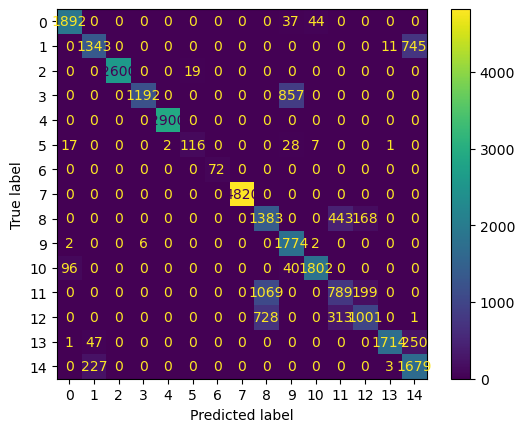

In [ ]:
mlp_predictions = mlp_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp_cm = confusion_matrix(y_test, mlp_predictions, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, mlp_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, mlp_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, mlp_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, mlp_predictions, average=None, labels=np.unique(y_test)) )

# print classification report
print("MLP Classification Report: ")
print(classification_report(y_test, mlp_predictions))

Macro: (0.8361641352496915, 0.8049580033253041, 0.8070236247895597, None)
Micro: (0.8238173455978975, 0.8238173455978975, 0.8238173455978975, None)
Weighted: (0.8489394955564277, 0.8238173455978975, 0.823823865273272, None)
Per-label: (array([0.94223108, 0.8305504 , 1.        , 0.99499165, 0.99931082,
       0.85925926, 1.        , 1.        , 0.43490566, 0.64839181,
       0.97142857, 0.51067961, 0.73172515, 0.99132447, 0.62766355]), array([0.95894577, 0.63982849, 0.99274532, 0.58174719, 1.        ,
       0.67836257, 1.        , 1.        , 0.69358074, 0.99439462,
       0.92982456, 0.3835683 , 0.48996574, 0.85188867, 0.87951807]), array([0.95051495, 0.72282024, 0.99635946, 0.7342162 , 0.99965529,
       0.75816993, 1.        , 1.        , 0.53459606, 0.78495575,
       0.95017137, 0.43808995, 0.58692466, 0.91633253, 0.73254799]), array([1973, 2099, 2619, 2049, 2900,  171,   72, 4820, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))
MLP Classification Report: 
        

In [ ]:
print (len(mlp_clf.coefs_))
print (mlp_clf.coefs_[0].shape)
print (mlp_clf.coefs_[1].shape)
print (len(mlp_clf.intercepts_))
print (mlp_clf.intercepts_[0].shape)
print (mlp_clf.intercepts_[1].shape)
print (mlp_clf.n_layers_)
print (type(mlp_clf.coefs_[0]))

2
(74, 100)
(100, 15)
2
(100,)
(15,)
3
<class 'numpy.ndarray'>


### 2.7 Extreme Gradient Boosting

In [ ]:
# https://www.geeksforgeeks.org/xgboost/
# https://www.section.io/engineering-education/machine-learning-with-xgboost-and-scikit-learn/

!pip install xgboost
import xgboost as xgb


In [ ]:

%%time
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)


CPU times: total: 10min 17s
Wall time: 28.2 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:

#predictions = xgb_classifier.predict(X_test)
#print("Accuracy of XGB Model::",accuracy_score(y_test,predictions))

xgb_score = xgb_classifier.score(X_test, y_test)
print("Accuracy of XGB model:", xgb_score)

# print classification report
xgb_predictions = xgb_classifier.predict(X_test)


Accuracy of XGB model: 0.9507884362680683


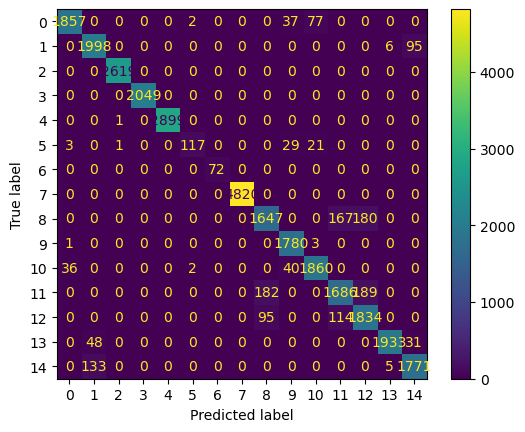

In [ ]:
xgb_predictions = xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xgb_cm = confusion_matrix(y_test, xgb_predictions, labels=xgb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_classifier.classes_)
disp.plot()
plt.show()


In [ ]:

from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, xgb_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, xgb_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, xgb_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, xgb_predictions, average=None, labels=np.unique(y_test)) )

print("XGB Classification Report: ")
print(classification_report(y_test, xgb_predictions))


Macro: (0.9485275724786476, 0.9310818719744531, 0.9379446500111649, None)
Micro: (0.9507884362680683, 0.9507884362680683, 0.9507884362680682, None)
Weighted: (0.9512152303611882, 0.9507884362680683, 0.9506252004756434, None)
Per-label: (array([0.97891407, 0.91693437, 0.99923693, 1.        , 1.        ,
       0.96694215, 1.        , 1.        , 0.85602911, 0.94379639,
       0.94849567, 0.85714286, 0.83250113, 0.99434156, 0.93357934]), array([0.94120628, 0.95188185, 1.        , 1.        , 0.99965517,
       0.68421053, 1.        , 1.        , 0.82597793, 0.99775785,
       0.95975232, 0.81964025, 0.89769946, 0.96073559, 0.92771084]), array([0.95968992, 0.93408135, 0.99961832, 1.        , 0.99982756,
       0.80136986, 1.        , 1.        , 0.84073507, 0.97002725,
       0.95409079, 0.83797217, 0.86387188, 0.97724975, 0.93063584]), array([1973, 2099, 2619, 2049, 2900,  171,   72, 4820, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))
XGB Classification Report: 
       

### 2.6 Support Vector machine